# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Read the Datset Using Pandas

In [2]:
df = pd.read_csv(r'C:\Users\dmlos\Achievement VI- Olist Business Analysis\Olist-Original Data (Kaggle)\df_geolocation_customers_sellers_items_orders_clean.csv', index_col = False)

# Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252419 entries, 0 to 16252418
Data columns (total 24 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Unnamed: 0                                   int64  
 1   customer_id                                  object 
 2   customer_zip_code                            int64  
 3   customer_city                                object 
 4   customer_state                               object 
 5   order_purchase_timestamp                     object 
 6   order_approved_at                            object 
 7   order_delivered_carrier_date                 object 
 8   order_delivered_customer_date                object 
 9   order_estimated_delivery_date                object 
 10  seller_id                                    object 
 11  shipping_limit_date                          object 
 12  price                                        float64
 13  freight_va

# Remove and Rename Columns

In [8]:
#Drop redundant column

df_1 = df.drop(columns = ['Delivery-Purchase_Time_Difference_Minutes'])

In [9]:
#Rename columns

df_1.rename(columns = {'seller_lat' : 'Seller_Latitude'}, inplace = True)
df_1.rename(columns = {'seller_lng' : 'Seller_Longitude'}, inplace = True)
df_1.rename(columns = {'freight_value' : 'Freight_Value'}, inplace = True)
df_1.rename(columns = {'seller_zip_code' : 'Seller_Zip_Code'}, inplace = True)
df_1.rename(columns = {'customer_zip_code' : 'Customer_Zip_Code'}, inplace = True)
df_1.rename(columns = {'price' : 'Price'}, inplace = True)

# Find Correlations between Variables

In [10]:
#Create a correlation matrix
df_1.corr()

,Unnamed: 0,Customer_Zip_Code,Price,Freight_Value,Seller_Zip_Code,Seller_Latitude,Seller_Longitude,Delivery-Purchase_Time_Difference_Min,Estimated-Purchase_Time_Difference_Min,Approval-Purchase_Time_Difference_Min,Carrier_Delivered-Order_Time_Difference_Min
Unnamed: 0,1.000000,0.000327,0.004366,-0.004420,0.004759,-0.009086,-0.005806,-0.004408,0.003558,-0.002159,0.002638
Customer_Zip_Code,0.000327,1.000000,0.046223,0.227469,0.088529,-0.023834,-0.022234,0.258970,0.363146,0.033006,0.009017
Price,0.004366,0.046223,1.000000,0.421351,0.084096,-0.026591,0.051845,0.056758,0.063742,0.013848,0.057003
Freight_Value,-0.004420,0.227469,0.421351,1.000000,0.142075,-0.005096,-0.014171,0.205978,0.256093,0.028080,0.081967
Seller_Zip_Code,0.004759,0.088529,0.084096,0.142075,1.000000,-0.310899,-0.412686,0.030295,0.168910,0.000709,0.006071
Seller_Latitude,-0.009086,-0.023834,-0.026591,-0.005096,-0.310899,1.000000,0.365175,0.047623,0.004972,-0.005305,-0.009159
Seller_Longitude,-0.005806,-0.022234,0.051845,-0.014171,-0.412686,0.365175,1.000000,-0.061547,-0.077933,-0.008000,-0.019951
Delivery-Purchase_Time_Difference_Min,-0.004408,0.258970,0.056758,0.205978,0.030295,0.047623,-0.061547,1.000000,0.360989,0.087096,0.410763
Estimated-Purchase_Time_Difference_Min,0.003558,0.363146,0.063742,0.256093,0.168910,0.004972,-0.077933,0.360989,1.000000,0.042269,0.202262
Approval-Purchase_Time_Difference_Min,-0.002159,0.033006,0.013848,0.028080,0.000709,-0.005305,-0.008000,0.087096,0.042269,1.000000,0.212017


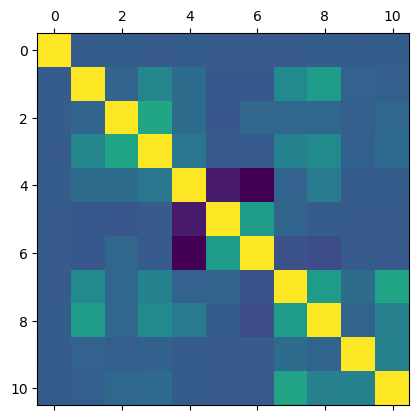

In [11]:
#Create a correlation heatmap using matplotlib
plt.matshow(df_1.corr())
plt.show()

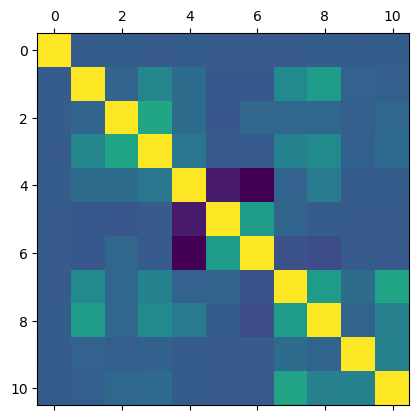

In [12]:
#Save figure
plt.matshow(df_1.corr())
plt.savefig("out.png")

In [13]:
#Current directory
cwd = os.getcwd()
cwd

'C:\\Users\\dmlos\\Achievement VI- Olist Business Analysis'

Text(0.5, 1.0, 'Correlation Matrix')

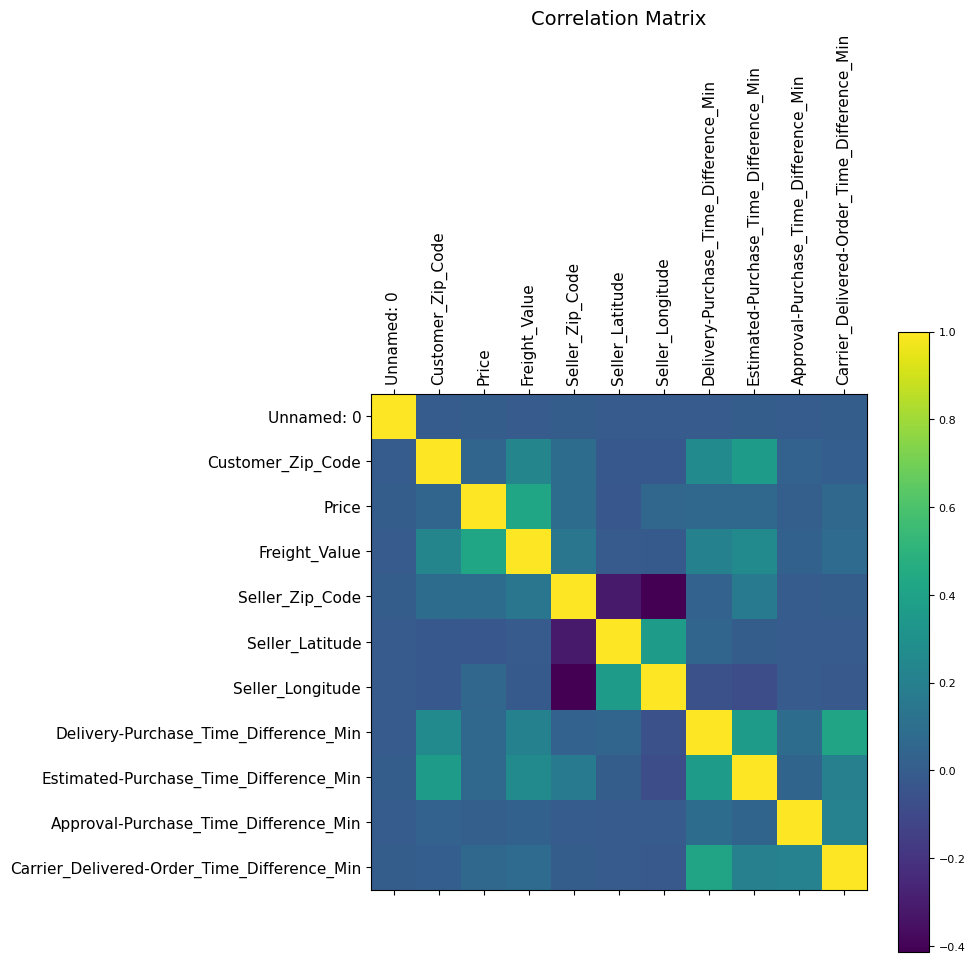

In [14]:
#Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_1.corr(), fignum=f.number) #type of plot
plt.xticks(range(df_1.select_dtypes(['number']).shape[1]), df_1.select_dtypes(['number']).columns, fontsize=11, rotation=90) #x axis labels
plt.yticks(range(df_1.select_dtypes(['number']).shape[1]), df_1.select_dtypes(['number']).columns, fontsize=11) #y axis labels
cb = plt.colorbar() #add color legend
cb.ax.tick_params(labelsize=8) #add font size
plt.title('Correlation Matrix', fontsize=14) #add title

In [49]:
#View the columns in the dataset
df_1.columns

Index(['Unnamed: 0', 'customer_id', 'Customer_Zip_Code', 'customer_city',
       'customer_state', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_id', 'shipping_limit_date',
       'Price', 'Freight_Value', 'Seller_Zip_Code', 'Seller_Latitude',
       'Seller_Longitude', 'seller_city', 'seller_state',
       'Delivery-Purchase_Time_Difference_Min',
       'Estimated-Purchase_Time_Difference_Min',
       'Approval-Purchase_Time_Difference_Min',
       'Carrier_Delivered-Order_Time_Difference_Min', 'Fulfillment Time'],
      dtype='object')

In [16]:
#Create a subset of relevant factors that include: zip codes, time differences, freight values, and prices

sub = df_1[['Customer_Zip_Code', 'Seller_Zip_Code', 'Delivery-Purchase_Time_Difference_Min', 'Estimated-Purchase_Time_Difference_Min','Approval-Purchase_Time_Difference_Min', 
            'Carrier_Delivered-Order_Time_Difference_Min','Freight_Value', 'Price']]

In [17]:
sub

,Customer_Zip_Code,Seller_Zip_Code,Delivery-Purchase_Time_Difference_Min,Estimated-Purchase_Time_Difference_Min,Approval-Purchase_Time_Difference_Min,Carrier_Delivered-Order_Time_Difference_Min,Freight_Value,Price
0,14409,8577,12690.000000,27894.416667,16.616667,9822.366667,21.88,124.99
1,14409,8577,12690.000000,27894.416667,16.616667,9822.366667,21.88,124.99
2,14409,8577,12690.000000,27894.416667,16.616667,9822.366667,21.88,124.99
3,14409,8577,12690.000000,27894.416667,16.616667,9822.366667,21.88,124.99
4,14409,8577,12690.000000,27894.416667,16.616667,9822.366667,21.88,124.99
...,...,...,...,...,...,...,...,...
16252414,6703,3804,10335.216667,27932.616667,263.266667,3169.966667,7.78,13.99
16252415,6703,3804,10335.216667,27932.616667,263.266667,3169.966667,7.78,13.99
16252416,6703,3804,10335.216667,27932.616667,263.266667,3169.966667,7.78,13.99
16252417,6703,3804,10335.216667,27932.616667,263.266667,3169.966667,7.78,13.99


# Create a Correlation Heatmap

In [29]:
df_reviews = pd.read_csv(r'C:\Users\dmlos\Achievement VI- Olist Business Analysis\Olist-Original Data (Kaggle)\olist_order_reviews_dataset.csv')

In [30]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


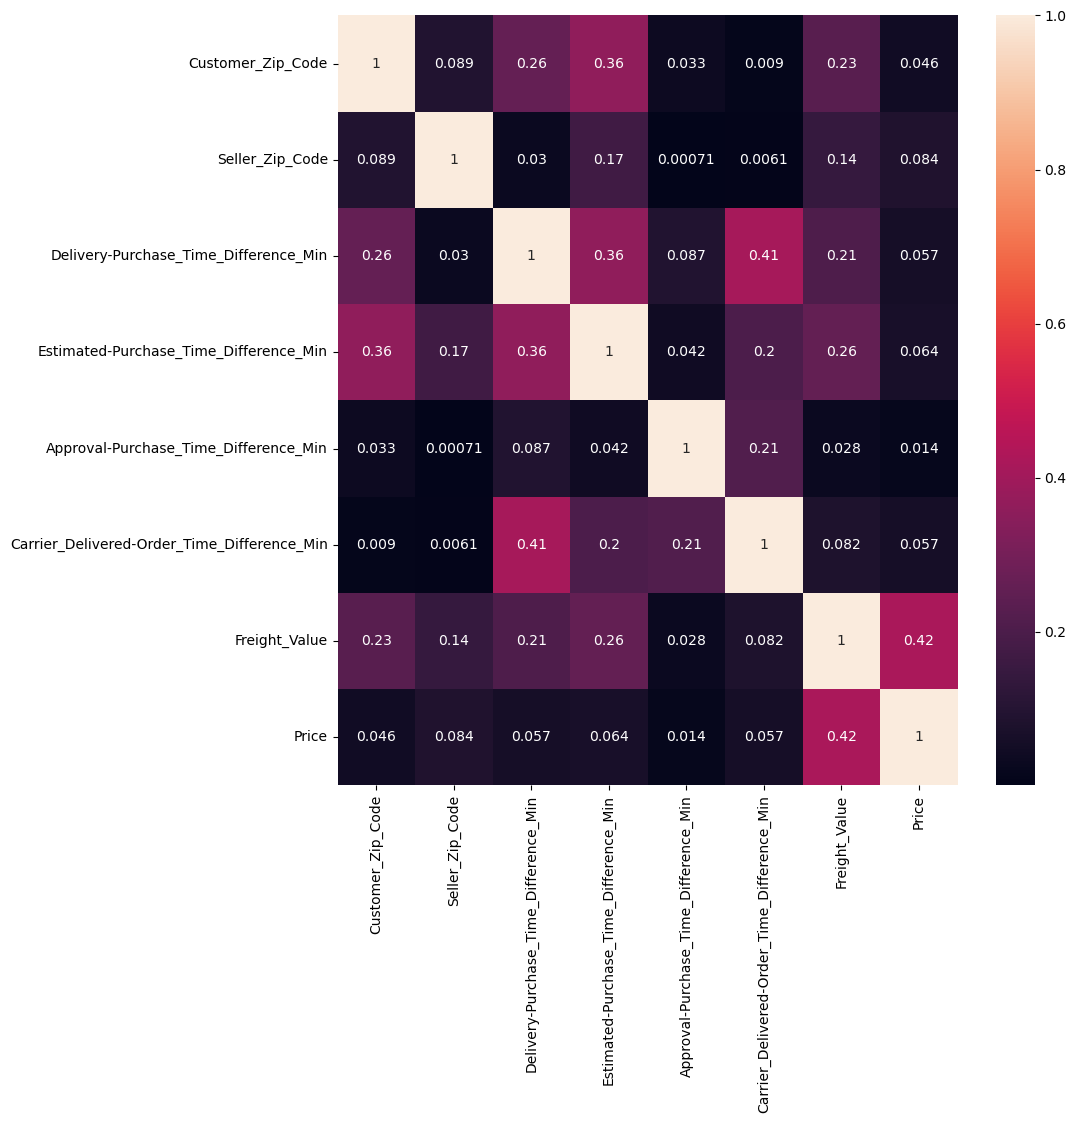

In [18]:
#Create a subplot with matplotlib
f, ax = plt.subplots(figsize= (10,10))

#Create the correlation heatmap by applying a heatmap onto the correlation matrix and the subplots as defined above. Use seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) #The annot argument allows the coefficients to be placed onto the boxes in the heatmap

# Create Scatterplots

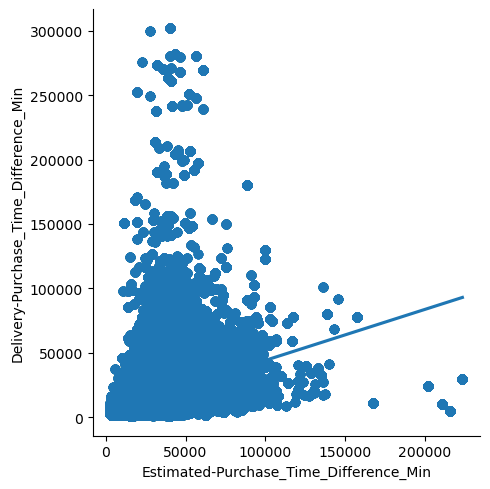

In [38]:
#Create a scatterplot for the Purchase-Delivery and Estimated-Purchase Time Differences

sns.lmplot(x = 'Customer_Zip_Code', y = 'Estimated-Purchase_Time_Difference_Min', data = df_1)

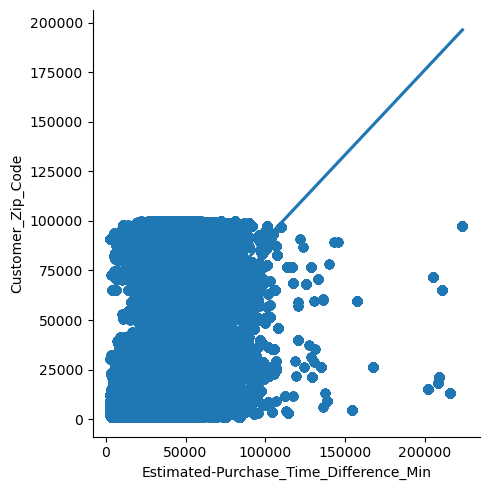

In [19]:
#Create a scatterplot for the Customer Zip Code and Estimated-Purchase Time Differences

sns.lmplot(x = 'Estimated-Purchase_Time_Difference_Min', y = 'Customer_Zip_Code', data = df_1)

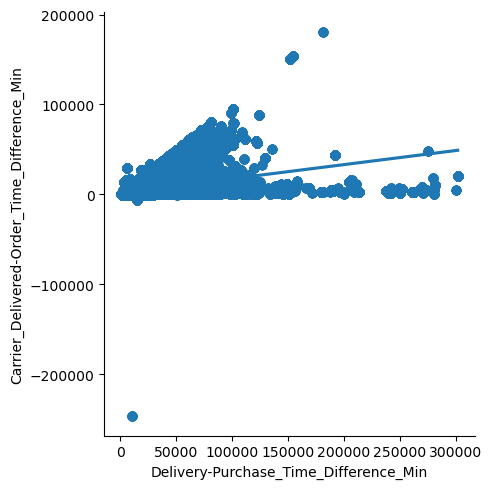

In [20]:
#Create a scatterplot for the Carrier-Ordered Time Difference and the Delivery-Purchase Time Difference

sns.lmplot(x = 'Delivery-Purchase_Time_Difference_Min', y = 'Carrier_Delivered-Order_Time_Difference_Min', data = df_1)

# Create Pair Plot

In [21]:
#Create a subset of only the variables you want in the pair plot
sub_2 = df_1[['Customer_Zip_Code', 'Delivery-Purchase_Time_Difference_Min', 'Estimated-Purchase_Time_Difference_Min', 
            'Carrier_Delivered-Order_Time_Difference_Min','Freight_Value', 'Price']]

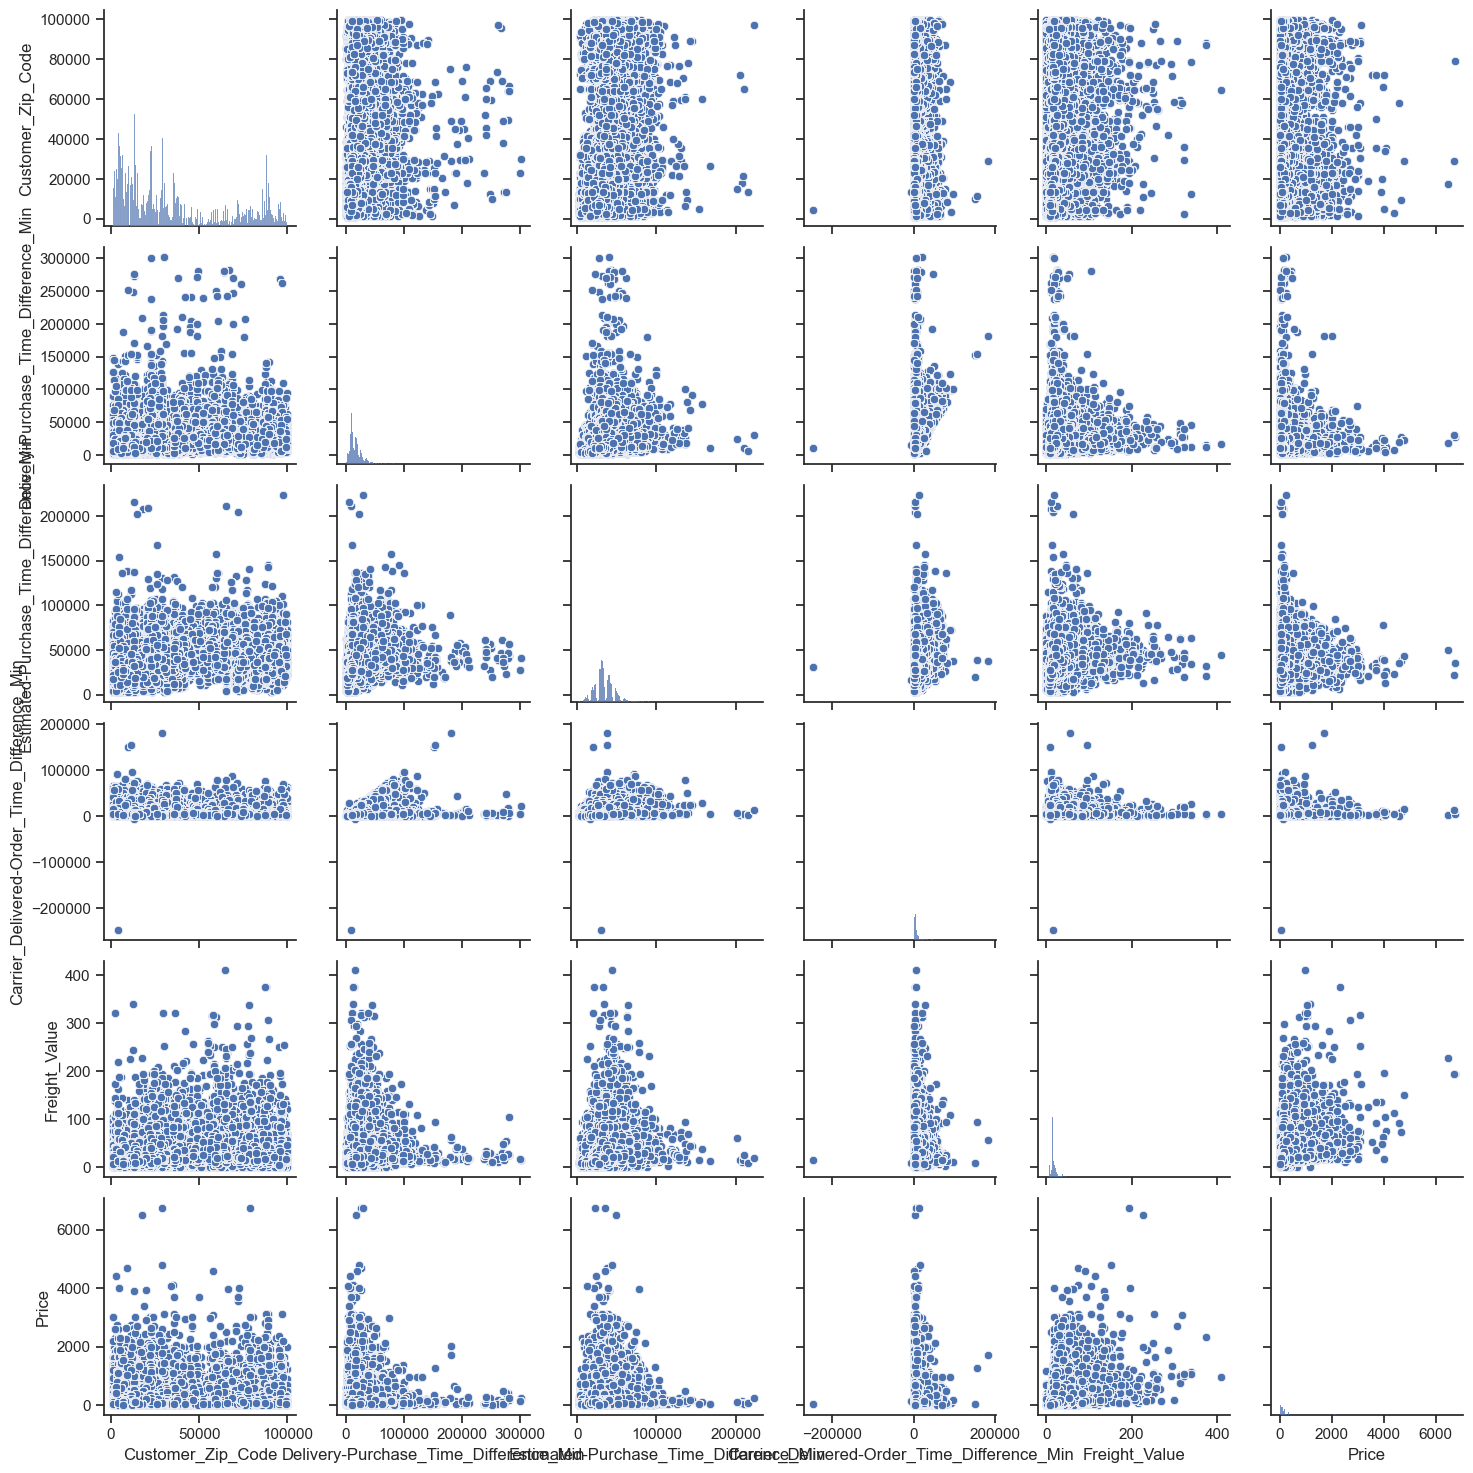

In [51]:
#Create a pair plot

g = sns.pairplot(sub_2)

# Categorical Plots

<AxesSubplot:xlabel='Delivery-Purchase_Time_Difference_Min', ylabel='Count'>

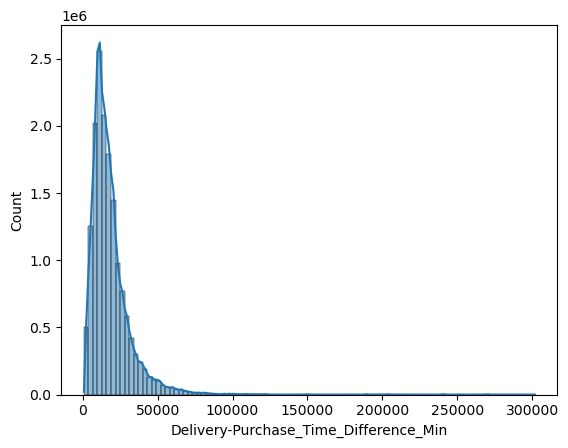

In [26]:
#Create a distribution showing order fulfillment times (i.e. Delivery-Purchase Time Difference) with a kernel density function(KDE), a Gaussian Distribution,

sns.histplot(df_1['Delivery-Purchase_Time_Difference_Min'], bins = 100, kde = True)

In [32]:
df_1.loc[df_1['Delivery-Purchase_Time_Difference_Min'] < 15000 , 'Fulfillment Time'] = 'Fast'

In [33]:
df_1.loc[(df_1['Delivery-Purchase_Time_Difference_Min'] >= 15000) & (df_1['Delivery-Purchase_Time_Difference_Min'] < 33000) , 'Fulfillment Time'] = 'Average'

In [34]:
df_1.loc[df['Delivery-Purchase_Time_Difference_Min'] >= 33000 , 'Fulfillment Time'] = 'Slow'

In [35]:
df_1['Fulfillment Time'].value_counts(dropna = False)

Fast       7979755
Average    6298485
Slow       1628530
NaN         345649
Name: Fulfillment Time, dtype: int64

In [38]:
df_1.columns

Index(['Unnamed: 0', 'customer_id', 'Customer_Zip_Code', 'customer_city',
       'customer_state', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_id', 'shipping_limit_date',
       'Price', 'Freight_Value', 'Seller_Zip_Code', 'Seller_Latitude',
       'Seller_Longitude', 'seller_city', 'seller_state',
       'Delivery-Purchase_Time_Difference_Min',
       'Estimated-Purchase_Time_Difference_Min',
       'Approval-Purchase_Time_Difference_Min',
       'Carrier_Delivered-Order_Time_Difference_Min', 'Fulfillment Time'],
      dtype='object')

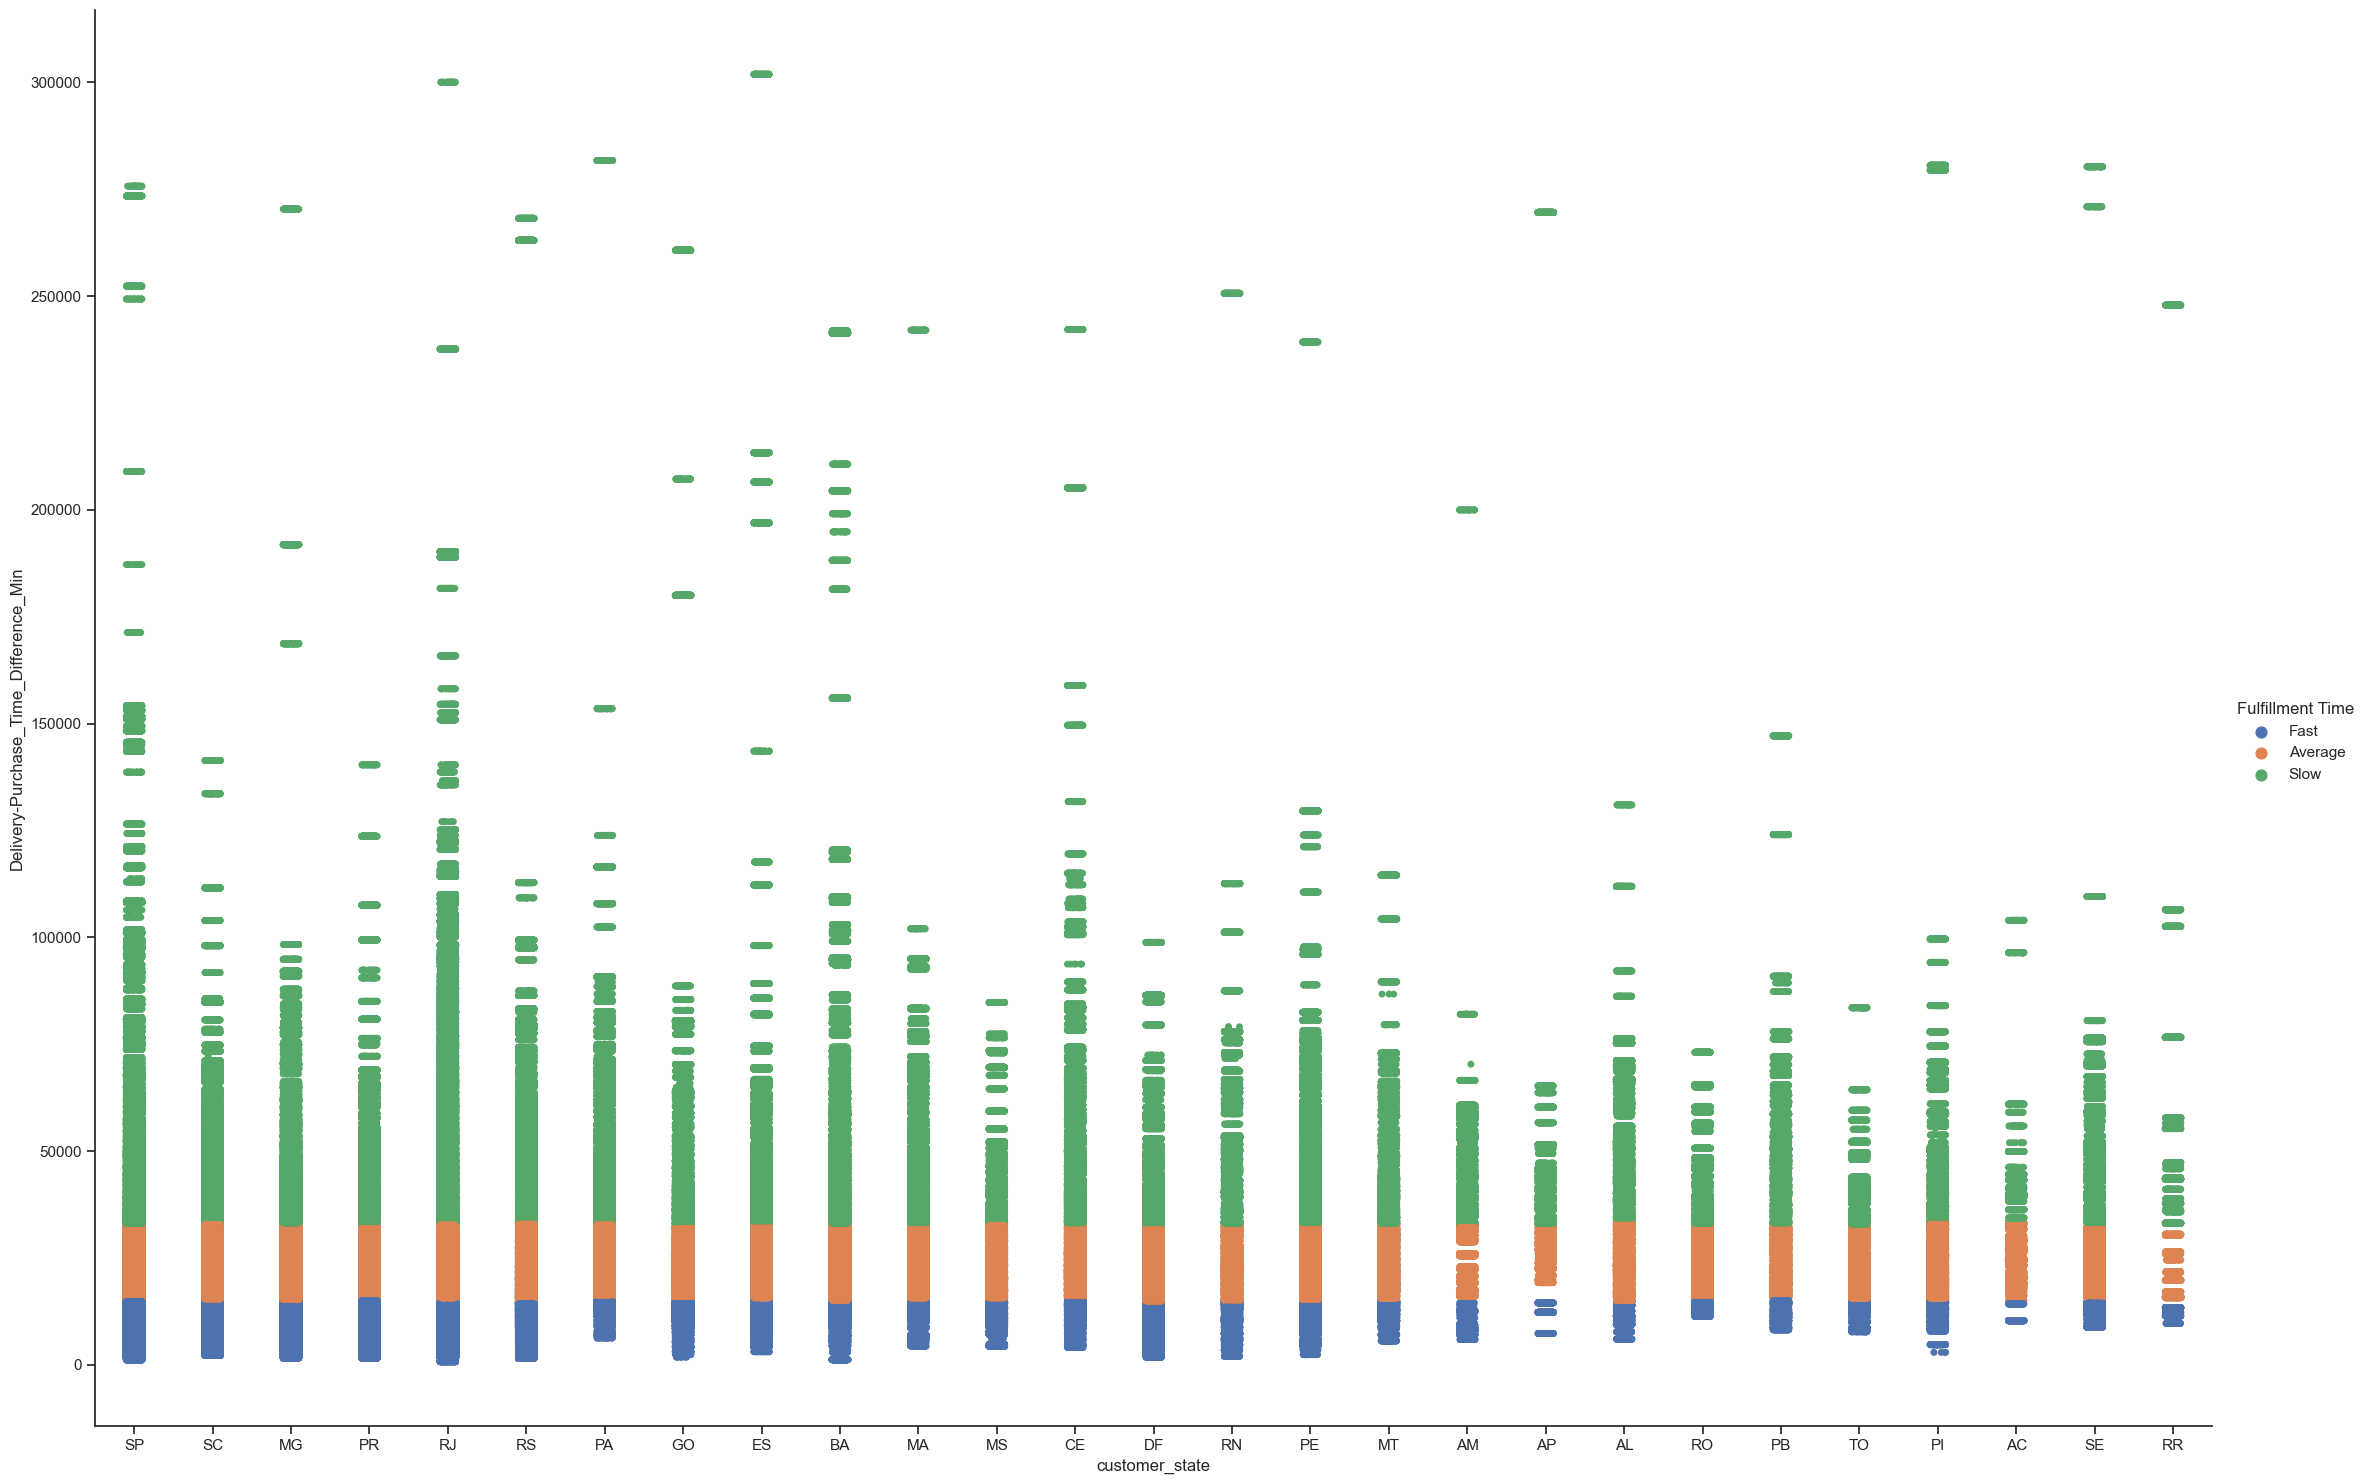

In [44]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='customer_state', y='Delivery-Purchase_Time_Difference_Min', hue='Fulfillment Time', data=df, height=15, aspect=1.5)

In [45]:
#Save the categorical plot as an image

g.savefig('Delivery Times.png')

<AxesSubplot:xlabel='Approval-Purchase_Time_Difference_Min', ylabel='Count'>

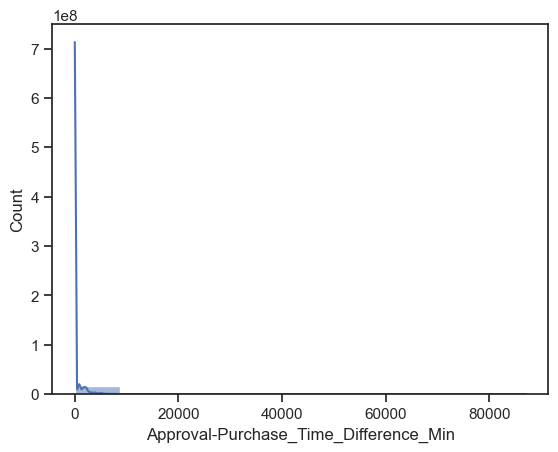

In [47]:
#Create a distribution showing approval time lags (i.e. Delivery-Purchase Time Difference) with a kernel density function(KDE), a Gaussian Distribution,

sns.histplot(df_1['Approval-Purchase_Time_Difference_Min'], bins = 10, kde = True)

<AxesSubplot:xlabel='Carrier_Delivered-Order_Time_Difference_Min', ylabel='Count'>

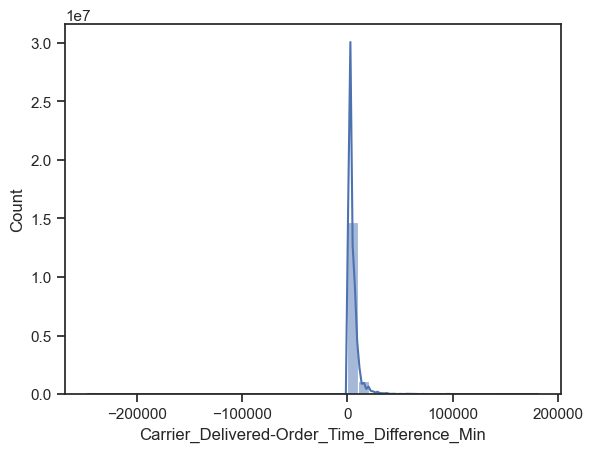

In [48]:
#Create a distribution showing approval time lags (i.e. Delivery-Purchase Time Difference) with a kernel density function(KDE), a Gaussian Distribution,

sns.histplot(df_1['Carrier_Delivered-Order_Time_Difference_Min'], bins = 40, kde = True)

# Create Distribution Charts

In [14]:
customer_zip_code = df['customer_zip_code'].dropna()

In [ ]:
#Show the distribution of sellers by state
df['seller_state'].value_counts().plot.bar()

<AxesSubplot:>

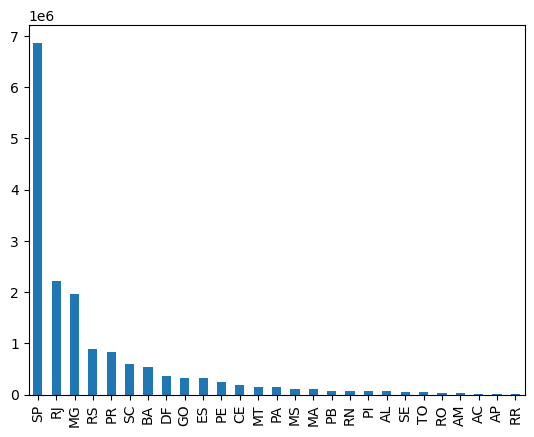

In [21]:
#Show the distribution of customers by state
df['customer_state'].value_counts().plot.bar()

In [ ]:
#Show the distribution of customers by city
df['customer_city'].value_counts().plot.bar()

In [ ]:
#Show the distribution of sellers by city
df['seller_city'].value_counts().plot.bar()

In [22]:
seller_lng = df['seller_lng'].dropna()

In [26]:
seller_lat = df['seller_lat'].dropna()

In [27]:
customer_lng = df['customer_lng'].dropna()

KeyError: 'customer_lng'

In [ ]:
customer_lat = df['customer_lat'].dropna()

C:\Users\dmlos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Customers by Longitude')

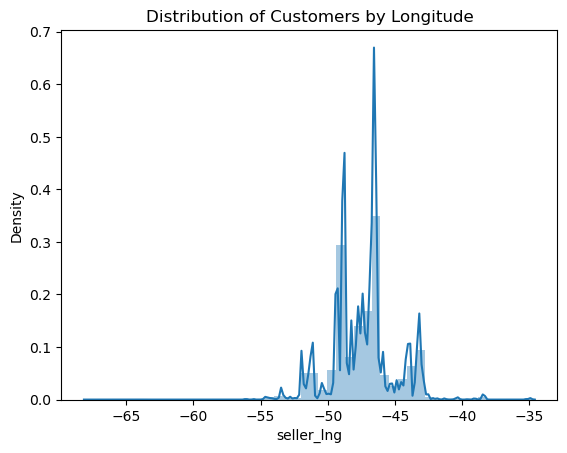

In [25]:
#Show the distribution of customers by customer_lng
customer_long_dist = sns.distplot(Selleer_lng)
customer_long_dist.set_title('Distribution of Sellers by Longitude')

In [ ]:
#Show the distribution of sellers by seller_lng
seller_long_dist = sns.distplot(seller_lng)
seller_long_dist.set_title('Distribution of Sellers by Longitude')

In [ ]:
#Show the distribution of sellers by seller_lat
seller_lat_dist = sns.distplot(seller_lat)
seller_lat_dist.set_title('Distribution of Sellers by Latitude')

In [16]:
seller_zip_code = df['seller_zip_code'].dropna()

C:\Users\dmlos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sellers by Zip Code')

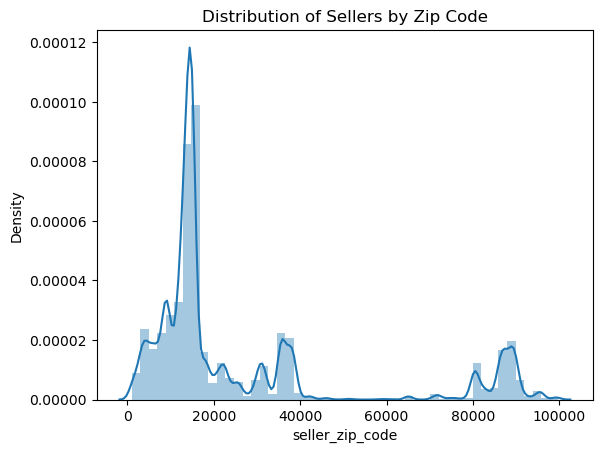

In [17]:
#Show the distribution of seller zip codes
seller_state_dist = sns.distplot(seller_zip_code)
seller_state_dist.set_title('Distribution of Sellers by Zip Code')